In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [5]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [7]:
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
df = train_set.copy()

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


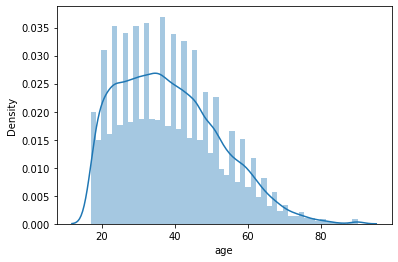

In [10]:
sns.distplot(df.age)

In [11]:
df2 = df[['age','fnlwgt','education_num','capital_gain','capital_loss']]

In [12]:
df2.dtypes

age              int64
fnlwgt           int64
education_num    int64
capital_gain     int64
capital_loss     int64
dtype: object

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

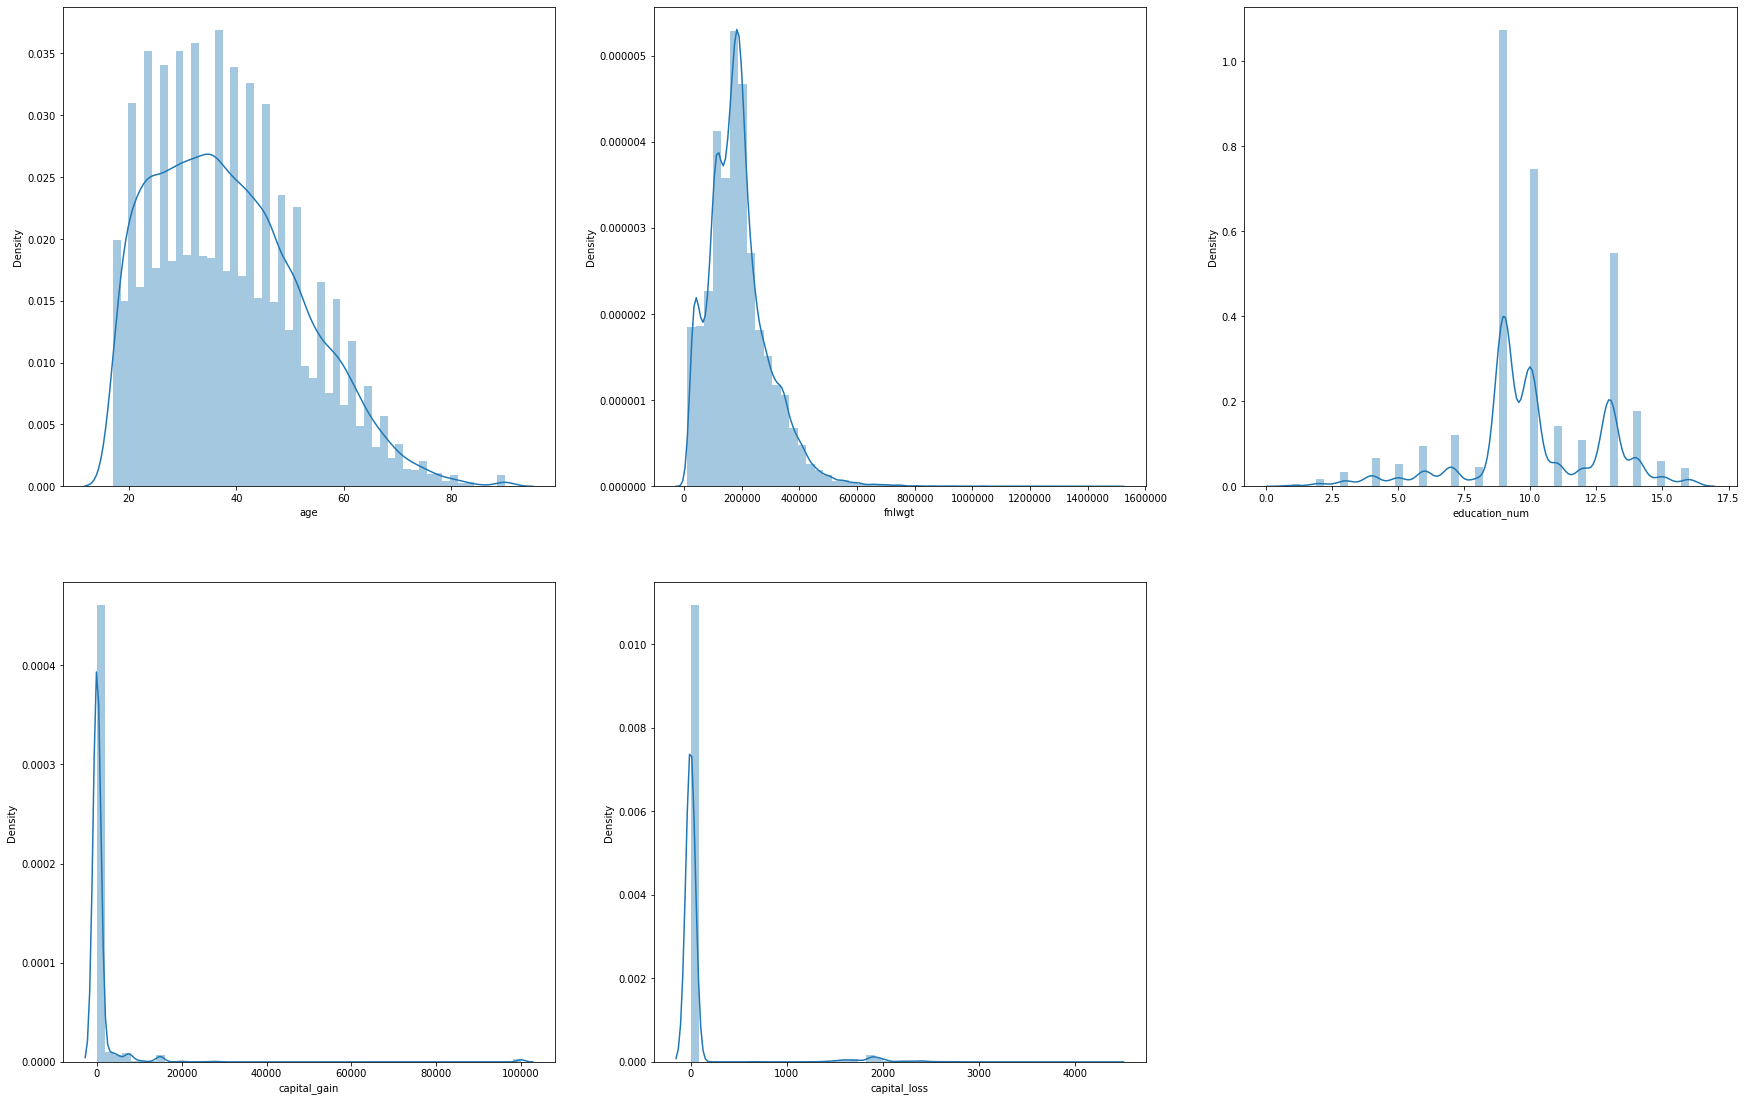

In [13]:
plt.figure(figsize=[30,30],facecolor='white')
plotnumber=1

for column in df2:
    if plotnumber<7:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column])
    plotnumber+=1
plt.show()

In [14]:
from scipy import stats 

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain varaible
    
    plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    
    plt.show()

In [18]:
corr = df2.corr()

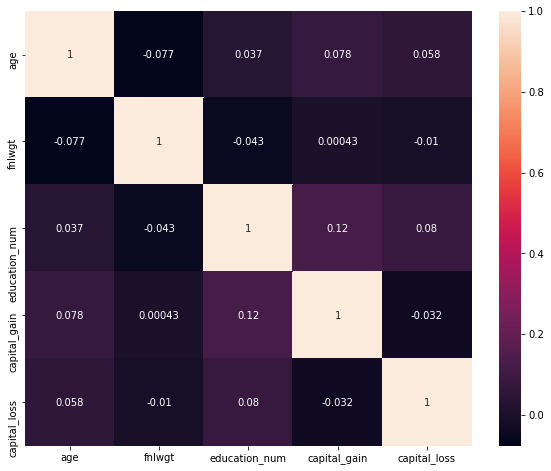

In [19]:
plt.figure(figsize=[10,8])
sns.heatmap(corr,annot=True
           )

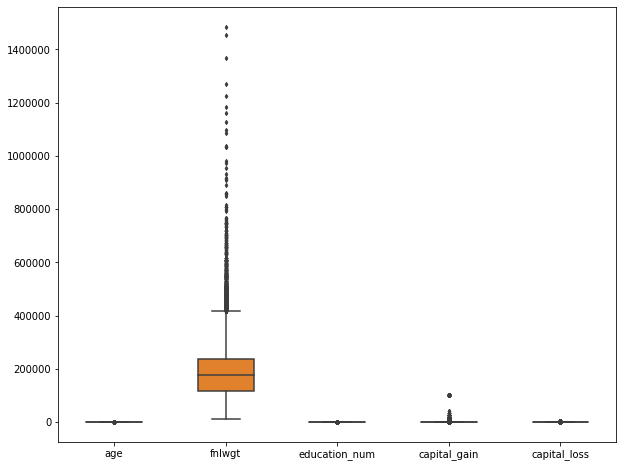

In [132]:
plt.figure(figsize=[10,8])
sns.boxplot(data=df2, width=0.5, fliersize=3)

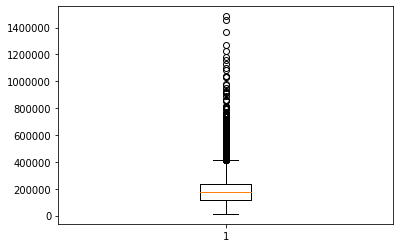

In [134]:
ax3 = plt.subplot()
my_box = ax3.boxplot(df2['fnlwgt'],showcaps=True)

In [135]:
caps = my_box['caps']
capbottom = caps[0].get_ydata()[0]
captop = caps[1].get_ydata()[0]

In [136]:
captop

415847.0

In [137]:
capbottom

12285.0

In [138]:
q = df2['fnlwgt'].quantile(0.9696)

In [139]:
q

415938.69600000046

In [140]:
data_cleaned = df2[df2['fnlwgt']<q]
data_cleaned

,age,fnlwgt,education_num,capital_gain,capital_loss
0,39,77516,13,2174,0
1,50,83311,13,0,0
2,38,215646,9,0,0
3,53,234721,7,0,0
4,28,338409,13,0,0
...,...,...,...,...,...
32556,27,257302,12,0,0
32557,40,154374,9,0,0
32558,58,151910,9,0,0
32559,22,201490,9,0,0


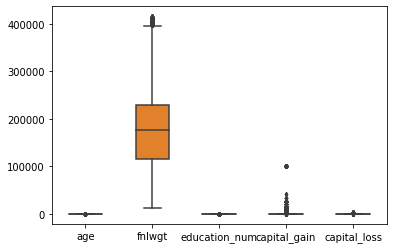

In [141]:
sns.boxplot(data = data_cleaned, width=0.5, fliersize=3,showcaps=True)

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


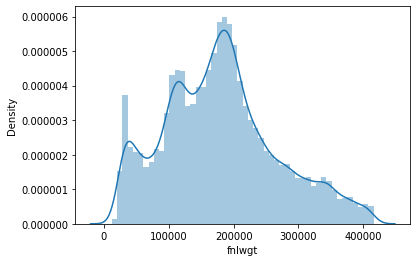

In [142]:
sns.distplot(data_cleaned['fnlwgt'])

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [147]:
data_cleaned

,age,fnlwgt,education_num,capital_gain,capital_loss
0,39,77516,13,2174,0
1,50,83311,13,0,0
2,38,215646,9,0,0
3,53,234721,7,0,0
4,28,338409,13,0,0
...,...,...,...,...,...
32556,27,257302,12,0,0
32557,40,154374,9,0,0
32558,58,151910,9,0,0
32559,22,201490,9,0,0


In [175]:
data_cleaned = df.drop('age',axis=1)
data_cleaned = df.drop('fnlwgt',axis=1)
data_cleaned = df.drop('education_num',axis=1)
data_cleaned = df.drop('capital_gain',axis=1)
data_cleaned = df.drop('capital_loss',axis=1)


In [176]:
data_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,United-States,<=50K


In [177]:
data_cleaned = pd.get_dummies(data_cleaned,drop_first=True)
data_cleaned

,age,fnlwgt,education_num,capital_gain,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,wage_class_ >50K
0,39,77516,13,2174,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,38,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,20,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [179]:
data = pd.DataFrame(sc.fit_transform(data_cleaned.drop('wage_class_ >50K',axis=1)),columns = data_cleaned.drop('wage_class_ >50K',axis=1).columns)
data

,age,fnlwgt,education_num,capital_gain,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.035429,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,-0.145920,-2.222153,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.197409,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32559,-1.215643,0.110960,-0.420060,-0.145920,-1.655225,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173


In [181]:
data['wage_class_ >50K'] = data_cleaned['wage_class_ >50K']

In [182]:
data

,age,fnlwgt,education_num,capital_gain,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,wage_class_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.035429,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0
1,0.837109,-1.008707,1.134739,-0.145920,-2.222153,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.197409,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,1
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0
32559,-1.215643,0.110960,-0.420060,-0.145920,-1.655225,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173,0


In [191]:
X  = data.drop('wage_class_ >50K',axis=1)
y = data['wage_class_ >50K']

In [192]:
X

,age,fnlwgt,education_num,capital_gain,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.035429,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,-0.145920,-2.222153,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.197409,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.035429,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
32559,-1.215643,0.110960,-0.420060,-0.145920,-1.655225,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173


In [196]:
X.columns.size

99

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:43: FutureW

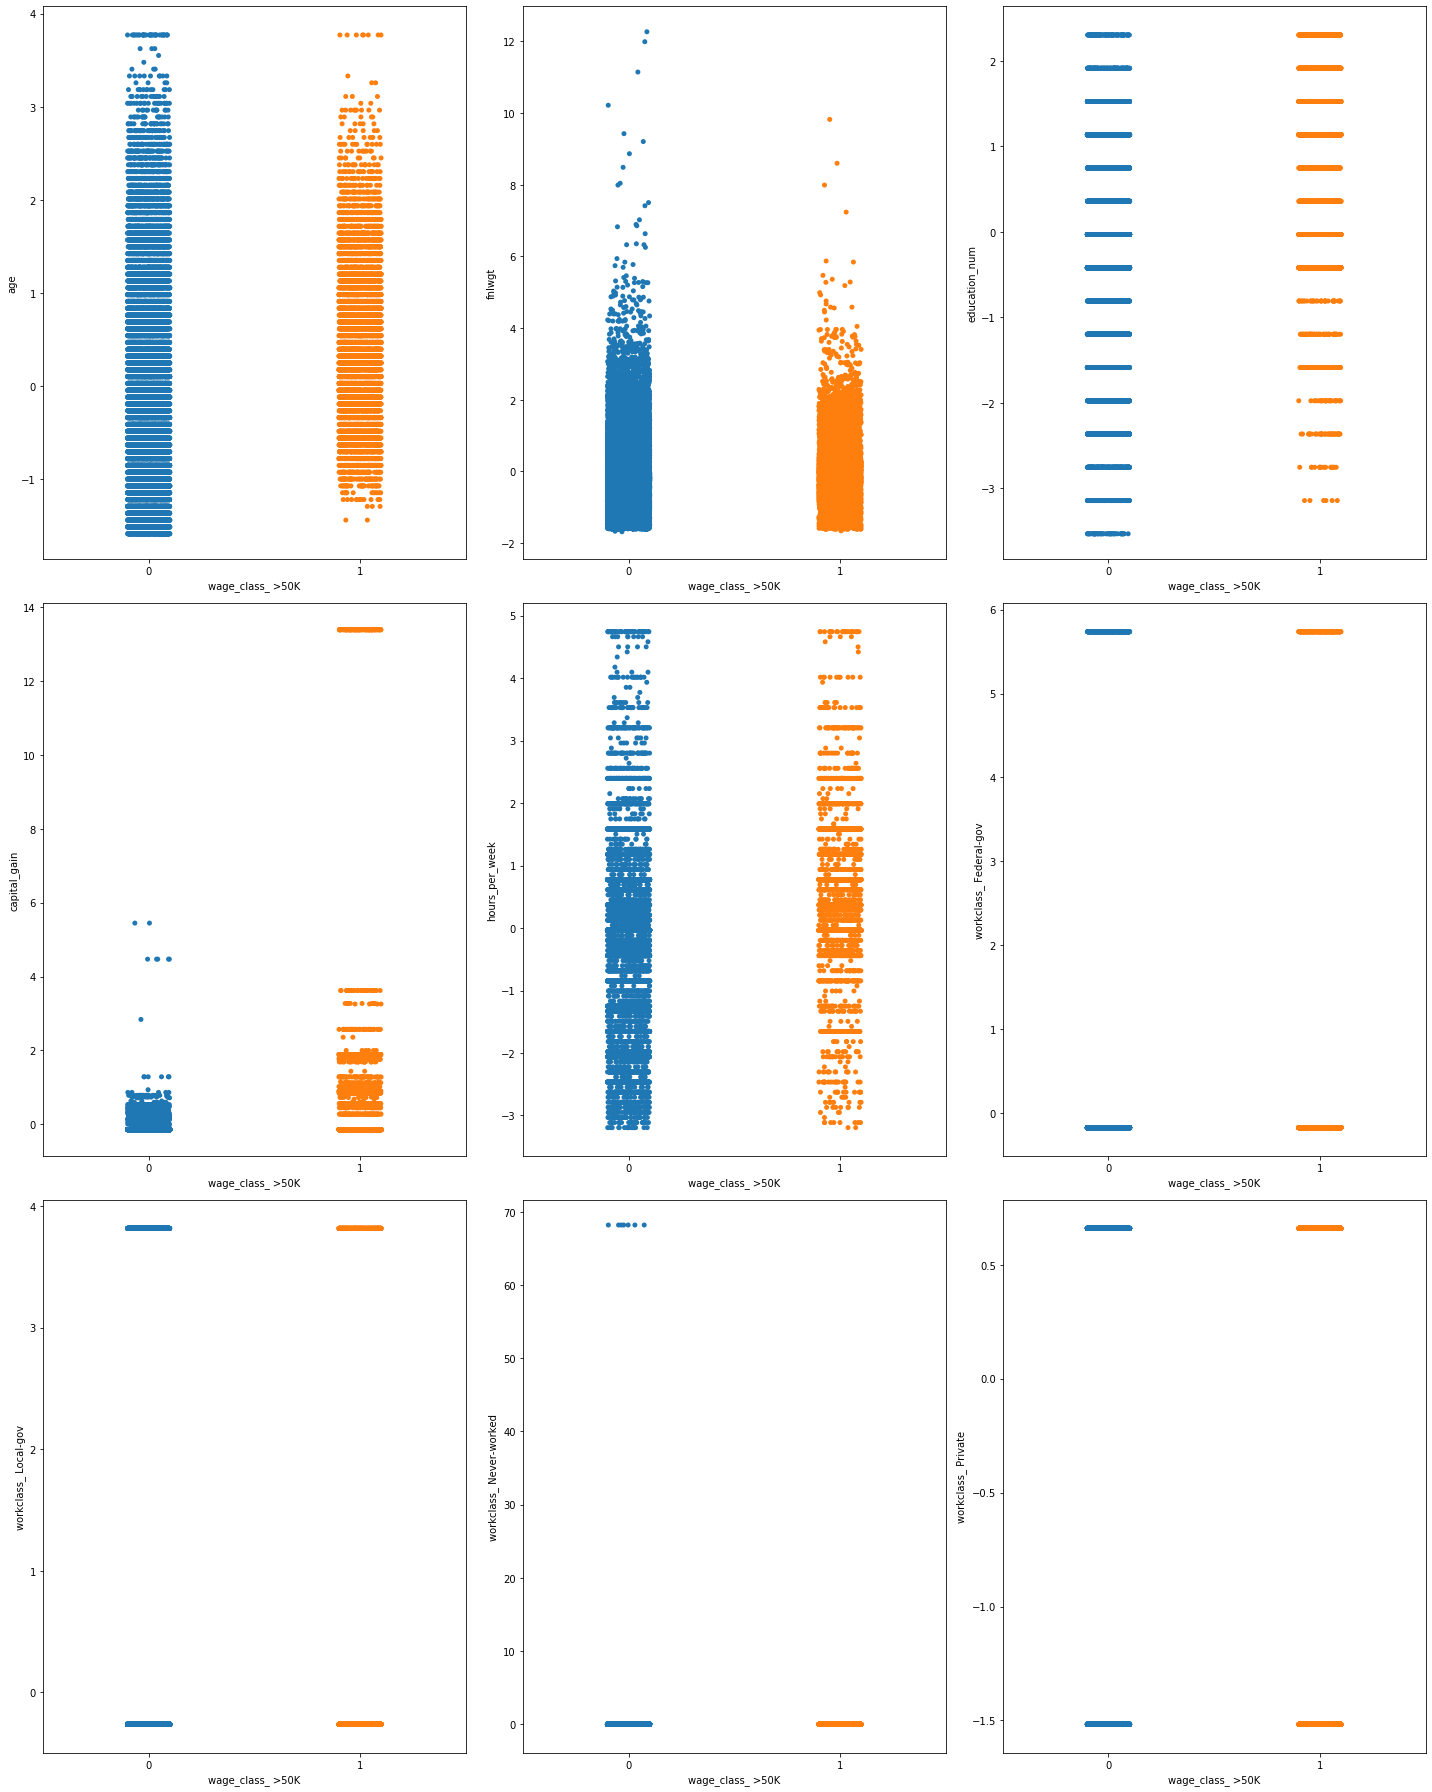

In [197]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [201]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [203]:
knn.score(X_train,y_train)

0.8727272727272727

In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [205]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8174671416287925

### Visualizing training result for any 2 features

In [233]:
x_train = X_train[['age','fnlwgt']]

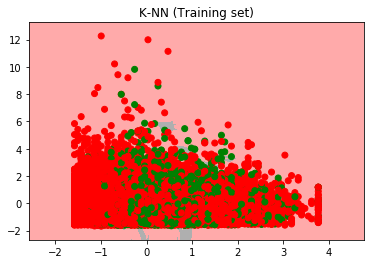

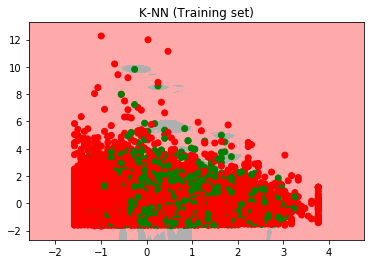

In [246]:
h = .01  # step size in the mesh

    # Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=6, weights=weights)
    clf.fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=ListedColormap(('red', 'green')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('K-NN (Training set)')

plt.show()

In [252]:
clf.score(x_train,y_train) # for 2 features

0.6961097461097461

### Visualizing the test results

In [248]:
x_test = X_test[['age','fnlwgt']]

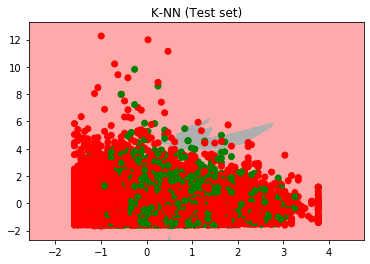

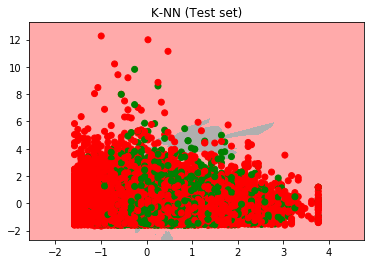

In [250]:
h = .01  # step size in the mesh

    # Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=6, weights=weights)
    clf.fit(x_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=ListedColormap(('red', 'green')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('K-NN (Test set)')

plt.show()

In [253]:
import pickle

In [259]:
filename = 'knn_model.pickle'

In [260]:
pickle.dump(knn,open(filename,'wb'))

### K-fold cross validation only to check how well our model is generalized 

In [264]:
from sklearn.model_selection import KFold

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [269]:
Kfold = KFold(n_splits=10,random_state=0)
Kfold.get_n_splits(X)

10

In [273]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size=18, n_neighbors = 11)
cnt = 0
count = []
train_score = []
test_score = []

for train_index, test_index in Kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ = knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))



for k =  1
train_score is :   0.8543884793884794 and test score is :   0.8210009210930304
for k =  2
train_score is :   0.8535744753455042 and test score is :   0.8323095823095823
for k =  3
train_score is :   0.853608599215151 and test score is :   0.8363022113022113
for k =  4
train_score is :   0.8545299436956151 and test score is :   0.816953316953317
for k =  5
train_score is :   0.8534379798669169 and test score is :   0.8298525798525799
for k =  6
train_score is :   0.855110049479611 and test score is :   0.8286240786240786
for k =  7
train_score is :   0.8535062276062105 and test score is :   0.8375307125307125
for k =  8
train_score is :   0.8541545811295 and test score is :   0.8326167076167076
for k =  9
train_score is :   0.8524483876471591 and test score is :   0.8335380835380836
for k =  10
train_score is :   0.8540522095205596 and test score is :   0.8126535626535627
************************************************
************************************************
Average

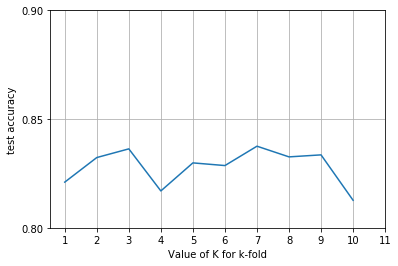

In [286]:
# plotting test-score

plt.plot(count, test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(1,12,1))
plt.yticks(np.arange(0.80,0.95,0.05))
plt.grid(True)